In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
# Ignore FutureWarning warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

Step 1: Import Libraries and Load the Data

In [2]:
df=pd.read_csv('/Users/candicewu/Desktop/cleaned_dataset.csv')
df.head(3)

,price_log,city,condition,grade,view,floors,bedrooms,bathrooms,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
0,5.640978,Issaquah,4,9,0,2.0,3,2.25,3.294466,4.545307,46,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
1,5.799341,Issaquah,3,9,0,2.0,4,2.75,3.432969,4.571441,23,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
2,5.579646,Issaquah,4,7,0,1.0,3,2.50,3.217484,4.147800,37,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0


Step 2: Data Preprocessing

In [3]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)


Step 3: Split the Data into Training and Testing Sets

In [4]:
# Define your features and target variable
X = df.drop('price_log', axis=1)
y = df['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4: Hyperparameter Tuning using GridSearchCV


In [5]:
#Train the XGBoost Model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)
print(model)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)


Step 5: Evaluate the Model

In [6]:
# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")



Mean Absolute Error: 1.8047724764591622
Mean Squared Error: 3.2883886249218794
Root Mean Squared Error: 1.8133914704006633
R² Score: -63.18875490663825


Step 6: Model Improvement

In [7]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.5, 0.7],
}

model = xgb.XGBRegressor(objective ='reg:squarederror')
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   2.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time= 

In [8]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [9]:
# Use the best model from hyperparameter tuning to make predictions on the test set
best_model = grid_search.best_estimator_  # or random_search.best_estimator_ for random search
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.05480842194708821
Mean Squared Error: 0.005866940465297035
Root Mean Squared Error: 0.07659595593304541
R² Score: 0.8854783766356885


<Figure size 4320x1440 with 0 Axes>

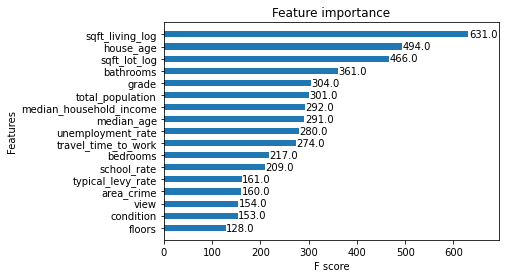

In [10]:
# Plot feature importance 
plt.figure(figsize=(60, 20))  # Adjust the figsize values as needed
ax = xgb.plot_importance(best_model, importance_type='weight', title='Feature importance', xlabel='F score', grid=False, max_num_features=17, height=0.5)
plt.show()

